In [1]:
cd C:\Users\PERT\Downloads\ML\Linear reg\bivariate

C:\Users\PERT\Downloads\ML\Linear reg\bivariate


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [3]:
df_train = pd.read_csv('train.csv',usecols=['LotArea','OverallQual','SalePrice'])

In [4]:
df_train.describe()

,LotArea,OverallQual,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,180921.195890
std,9981.264932,1.382997,79442.502883
min,1300.000000,1.000000,34900.000000
25%,7553.500000,5.000000,129975.000000
50%,9478.500000,6.000000,163000.000000
75%,11601.500000,7.000000,214000.000000
max,215245.000000,10.000000,755000.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LotArea      1460 non-null   int64
 1   OverallQual  1460 non-null   int64
 2   SalePrice    1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


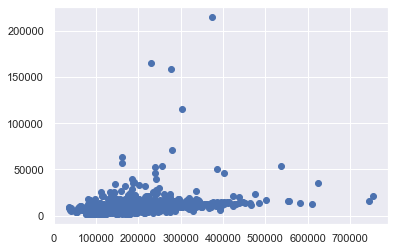

In [6]:
plt.scatter(df_train['SalePrice'],df_train['LotArea'])

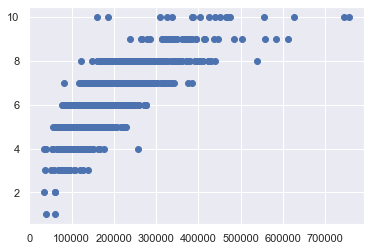

In [7]:
plt.scatter(df_train['SalePrice'],df_train['OverallQual'])

In [8]:
x = df_train[['LotArea','OverallQual']].to_numpy()
y = df_train['SalePrice']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print("X_train data:",X_train.shape)
print("y_train data:",y_train.shape)
print("X_test data:",X_test.shape)
print("y_test data:",y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

X_train data: (978, 2)
y_train data: (978,)
X_test data: (482, 2)
y_test data: (482,)


In [10]:
model.fit(x,y)

LinearRegression()

In [11]:
#sample prediction

model.predict([[270,3]])

array([28674.32312241])

In [13]:
y_pred = model.predict(X_test)


In [15]:
#MAE & R2

from sklearn.metrics import r2_score,mean_absolute_error 
print('r2: ',r2_score(y_test,y_pred))
print('MAE: ', mean_absolute_error(y_test,y_pred))

r2:  0.669033597434214
MAE:  31203.722768947366


Extremely high MAE!! This data is not good for linear reg :(
Lets try polynomial

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) # example of feature processing
X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression(normalize = True)

pol_reg.fit(X_poly, y_train)


# Predict
X_p = poly_reg.fit_transform(X_test)
y_predicted = pol_reg.predict(X_p)

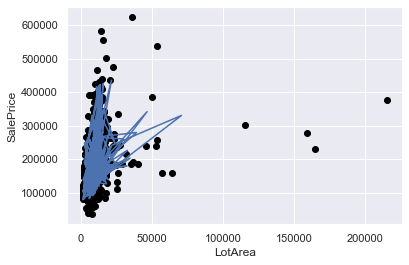

In [17]:
plt.scatter( X_train[:,0], y_train,color="black")
plt.plot( X_test[:,0], y_predicted)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

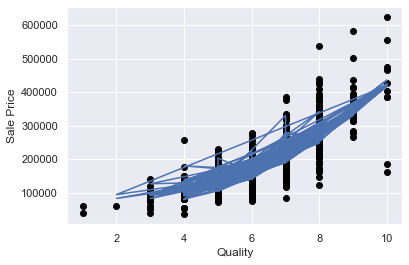

In [18]:
plt.scatter( X_train[:,1], y_train,color="black")
plt.plot( X_test[:,1], y_predicted)
plt.xlabel('Quality')
plt.ylabel('Sale Price')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error



# model evaluation
MAE = (mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,pol_reg.coef_)
print('Intercept:', pol_reg.intercept_)
print('Mean squared error: ', MAE)
print('R2 score: ', r2)

Slope: [ 0.00000000e+00  4.60673339e+00 -2.60179342e+04 -1.23714152e-05
 -2.33743431e-01  5.65888868e+03]
Intercept: 87051.20988479466
Mean squared error:  1945269568.9992402
R2 score:  0.7350271258604881


These 2 features alone is not very appropriate to use in predicting sale price of a house :)